<a href="https://colab.research.google.com/github/ayanajade/ayanajade/blob/main/mobilenetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7yuvRBeGWAgrcLpalf0M")
project = rf.workspace("mushroom-01i2l").project("my-first-project-pzzig")
version = project.version(6)
dataset = version.download("folder")

!pip install roboflow tensorflow

# 📦 Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping

# 📐 Set image size and batch size
IMG_SIZE = (224, 224)
IMG_HEIGHT, IMG_WIDTH = IMG_SIZE
BATCH_SIZE = 32
DATASET_PATH = "My-First-Project-6"

# 📁 Load datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    f"{DATASET_PATH}/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    f"{DATASET_PATH}/valid",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

# 🏷️ Get class names BEFORE prefetching
class_names = train_ds.class_names
NUM_CLASSES = len(class_names)
print("Classes:", class_names)

# ⚡ Improve performance with prefetching
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# 🔄 Data augmentation
data_augmentation = models.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

# 🧠 Load base model (MobileNetV2)
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze base model

# 🏗️ Build model using Functional API
inputs = layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)
model = models.Model(inputs, outputs)

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# ⚙️ Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 🧪 Train model
history = model.fit(train_ds, validation_data=val_ds, epochs=30, callbacks=[early_stop])



loading Roboflow workspace...
loading Roboflow project...
Found 150 files belonging to 2 classes.
Found 220 files belonging to 2 classes.
Classes: ['Pleurotus Ostreatus', 'Pleurotus Pulmonarius']
Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 7s/step - accuracy: 0.5555 - loss: 0.7781 - val_accuracy: 0.6545 - val_loss: 0.6423
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 0.6770 - loss: 0.6783 - val_accuracy: 0.7136 - val_loss: 0.6140
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.7088 - loss: 0.5752 - val_accuracy: 0.7227 - val_loss: 0.5550
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.7993 - loss: 0.4898 - val_accuracy: 0.7636 - val_loss: 0.5121
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 0.8243 - loss: 0.4163 - val_accuracy: 0.7682 - val_loss: 0.4856
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 18s 4s/step - accuracy: 0.8574 - loss: 0.3714 - val_accuracy: 0.7909 - val_loss: 0.4649
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 

In [13]:
model.evaluate(val_ds)
model.save("mobilenetv2_mushroom_classifier.h5")


7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.8561 - loss: 0.3717


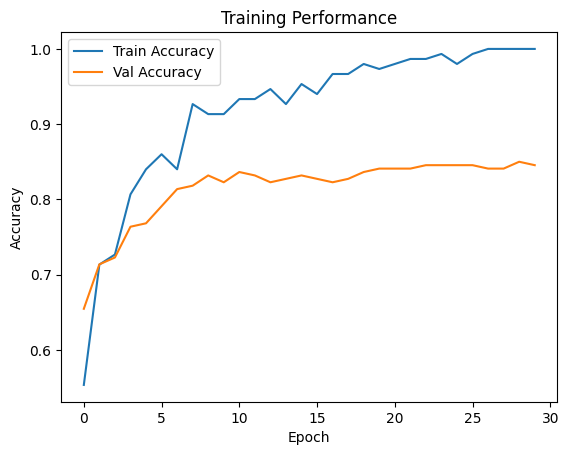

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Performance')
plt.show()
